In [1]:
import numpy as np
import pandas as pd
import numpy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import math

# Load in the dataset & Reshape

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
file_names = ['data_batch_1','data_batch_2','data_batch_3','data_batch_4','data_batch_5']
data_batch=[]
for i in range(5):  # data_batch_1, data_batch_2, ..., data_batch_5
    data_batch.append(unpickle('cifar-10-batches-py/' + file_names[i]))
# combine the test and train sets
data_batch.append(unpickle('cifar-10-batches-py/test_batch'))

In [4]:
label_names = unpickle('cifar-10-batches-py/batches.meta')[b'label_names']
label_names

[b'airplane',
 b'automobile',
 b'bird',
 b'cat',
 b'deer',
 b'dog',
 b'frog',
 b'horse',
 b'ship',
 b'truck']

In [5]:
# load in data and reshape 
data = []
for i in range(len(data_batch)):
    data.append(data_batch[i][b'data'])
data = np.reshape(data, (60000,3072))
data

array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       ..., 
       [ 20,  19,  15, ...,  50,  53,  47],
       [ 25,  15,  23, ...,  80,  81,  80],
       [ 73,  98,  99, ...,  94,  58,  26]], dtype=uint8)

In [6]:
# load in labels and reshape
labels = []
for i in range(len(data_batch)):
    labels.append(data_batch[i][b'labels'])
labels = np.reshape(labels, 60000)
labels

array([6, 9, 9, ..., 5, 1, 7])

In [7]:
data_in_category = [[],[],[],[],[],[],[],[],[],[]] 
for i,item in enumerate(labels):
    data_in_category[item].append(data[i])

## Compute the mean image for each category

In [8]:
mean_images = []
pca20 = []
list_all = []
for i in range(10):
    current = data_in_category[i]
    pca=PCA(n_components=20)
    model = pca.fit_transform(current)
    list_all.append((pca.mean_, pca.components_, data_in_category[i]))
    mean_images.append(pca.mean_)
    pca20.append(pca.inverse_transform(model))

In [9]:
def ShowImage(data):
    r=data[:1024]
    g=data[1024:2048]
    b=data[2048:]
    r=np.reshape(r,(32,32))
    g=np.reshape(g,(32,32))
    b=np.reshape(b,(32,32))
    im=np.dstack((r,g,b))
    plt.imshow(im/255.0)
    plt.show()

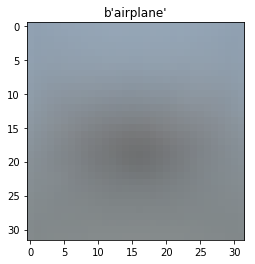

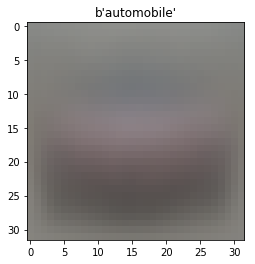

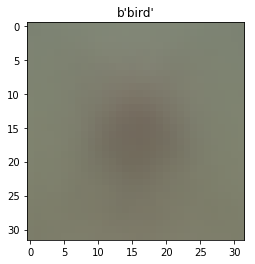

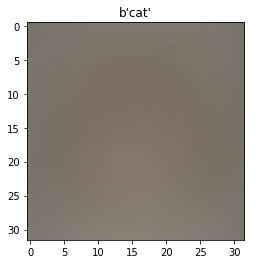

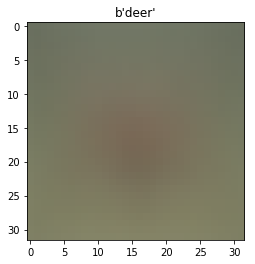

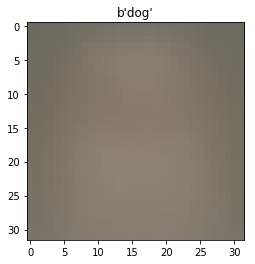

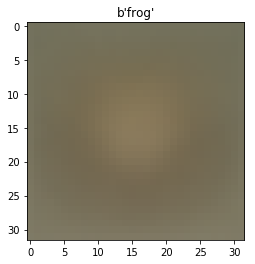

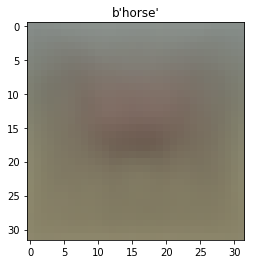

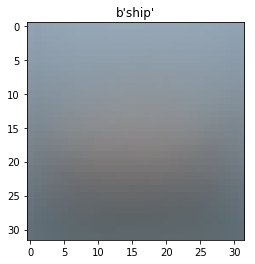

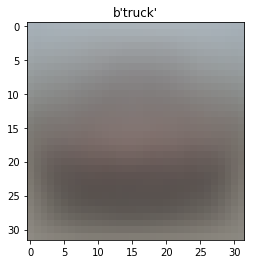

In [11]:
for i in range(10):
    plt.title(str(label_names[i]))
    ShowImage(mean_images[i])   

In [12]:
error = []
#for each image, find the per-pixel differences between the reconstruction 
#and its original image
for i in range(10):
    curr_error = np.sum(la.norm(data_in_category[i] - pca20[i])**2, axis = 0)
    error.append(curr_error/6000)

In [13]:
error

[2620511.8338774699,
 3950695.5963715599,
 2447762.4661361366,
 3116492.9583396506,
 2180394.5793985864,
 3231136.5706984629,
 2630295.6563852504,
 3441232.261887176,
 2440640.9844239736,
 4021145.4759662915]

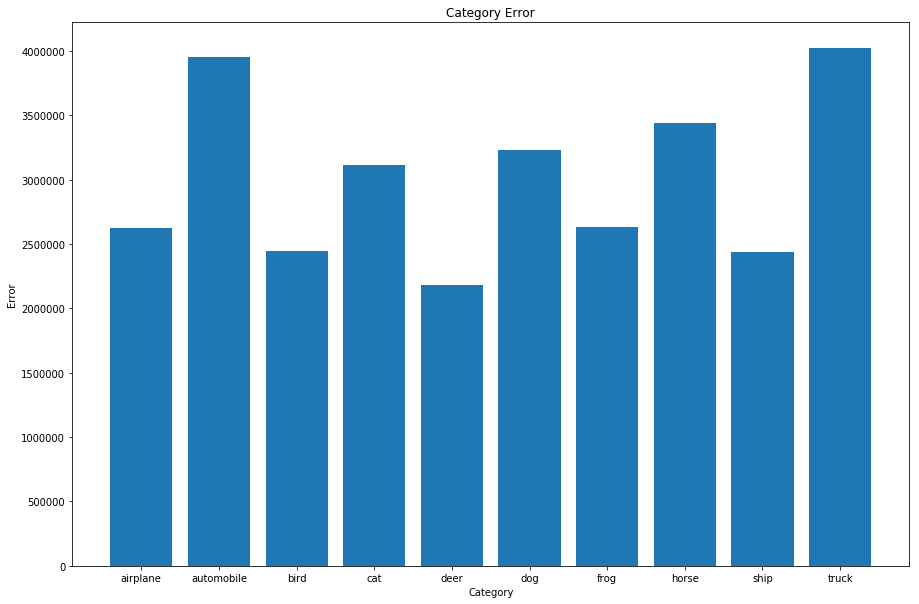

In [23]:
labels = ["airplane", "automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

plt.figure(figsize=(15,10))
plt.bar(np.arange(10), error)
plt.xticks(list(range(len(data_in_category))),labels)
plt.title("Category Error")
plt.xlabel("Category")
plt.ylabel("Error")
plt.show()

# partb:

In [18]:
from sklearn import manifold
import matplotlib.pyplot as plt


In [19]:
mds = manifold.MDS()

In [20]:
dis = mds.fit_transform(mean_images)
dis

array([[-1130.84031613,  -903.7090246 ],
       [  484.20057777,  -322.35326005],
       [  -53.67796945,   233.7060915 ],
       [  210.62131649,   529.46499761],
       [   -7.04597354,   819.53994042],
       [  538.38708783,   575.28880443],
       [  273.4301782 ,  1052.01787083],
       [ -290.62845152,   311.43671712],
       [ -421.32065634, -1227.71324335],
       [  396.87420669, -1067.6788939 ]])

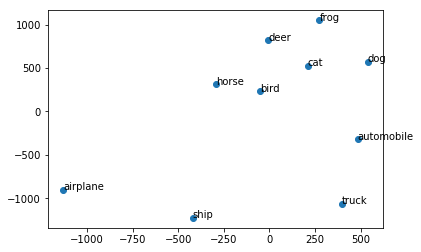

In [21]:
n=['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']
x = dis[:,0]
y = dis[:,1]
fig, ax = plt.subplots()
ax.scatter(x, y)
for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]))

# PartC

In [48]:
def error_pca(mean, compo, data):
    pca = PCA(n_components=20)
    pca.mean_ = mean
    pca.components_ = compo
    pca_20 = pca.transform(data)
    first_20 = pca.inverse_transform(pca_20)
    difference = first_20 - data
    difference *= difference
    error = sum(sum(difference)) / len(data)
    return error

def error_matrix(list_all):
    error_matrix = np.zeros((len(list_all), len(list_all)))
    for i, (mean_A, compo_A, A) in enumerate(list_all):
        for j, (mean_B, compo_B, B) in enumerate(list_all):
            AToB = error_pca(mean_A, compo_B, A)
            BToA = error_pca(mean_B, compo_A, B)
            error_matrix[i][j] = (AToB + BToA)*0.5
    return error_matrix

error_matrix = error_matrix(list_all)
mds_2 = manifold.MDS(dissimilarity = "precomputed")
error_matrix

array([[ 2620515.79876689,  3723667.2715442 ,  2794458.53359105,
         3307395.73213754,  2554907.80820103,  3399543.11199845,
         2950270.1698333 ,  3394895.05414162,  2715859.69657039,
         3794371.32261369],
       [ 3723667.2715442 ,  3950689.75389573,  3700069.36369275,
         4039635.15864749,  3450473.36320432,  4210817.63986452,
         3685039.22688584,  4230141.23786029,  3489023.92285796,
         4135052.07503941],
       [ 2794458.53359105,  3700069.36369275,  2447712.23765958,
         2939560.53228893,  2423769.76605714,  2967173.77149284,
         2685900.4244542 ,  3199880.63347882,  2813374.41484736,
         3635029.43463654],
       [ 3307395.73213754,  4039635.15864749,  2939560.53228893,
         3116511.56431118,  2889656.05123299,  3262695.79908169,
         3028747.23150135,  3545921.67339367,  3202620.71085947,
         3897768.64979686],
       [ 2554907.80820103,  3450473.36320432,  2423769.76605714,
         2889656.05123299,  2180392.1261912

In [61]:
dis_2 = mds_2.fit_transform(error_matrix)

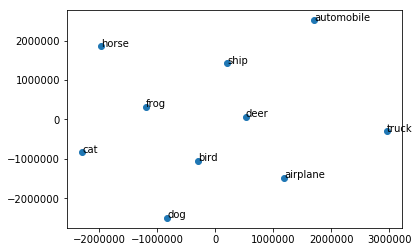

In [62]:
n=['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']
x = dis_2[:,0]
y = dis_2[:,1]
fig, ax = plt.subplots()
ax.scatter(x, y)
for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]))